## chapter 1: Software and packages

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

## chapter 2: Basic operation and Images

In [2]:
#2.1 importing, drawing and displying

In [3]:
img = cv2.imread("image2.png",0)

In [4]:
img

array([[104, 104, 104, ...,  63,  63,  63],
       [102, 102, 102, ...,  64,  64,  64],
       [102, 101, 101, ...,  64,  64,  64],
       ...,
       [ 14,  14,  14, ...,   3,   3,   3],
       [ 14,  13,  13, ...,   3,   3,   3],
       [ 14,  13,  13, ...,   3,   3,   3]], dtype=uint8)

In [5]:
img[1,2] == 4

False

In [6]:
def wind(image):
    cv2.namedWindow("image",cv2.WINDOW_NORMAL)
    cv2.imshow("image",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
wind(img)

In [8]:
imgCol = cv2.imread("image2.png",1)

In [9]:
wind(imgCol)

In [10]:
imgCol1 = deepcopy(imgCol)
cercle = cv2.circle(imgCol1,(160,104),120,(0,202,225),20)
wind(cercle)

In [11]:
imgN1 = cv2.imread("1-111.jpg",1)

In [12]:
imgN = deepcopy(imgN1)
def click2circle(event, x, y, flags, param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(imgN,(x,y),50,(255,0,0),4)

cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

while True:
    cv2.imshow("differences",imgN)
    a=cv2.waitKey(2000)
    if a == 27:
        break
cv2.destroyAllWindows()

In [13]:
wind(imgN)

In [14]:
#2.2.Splitting channels, map algebra

In [15]:
wind(imgCol)

In [16]:
b,g,r=cv2.split(imgCol)

In [17]:
wind(b-r)

In [18]:
imgCol2 = cv2.merge((b,g,r))

In [19]:
#2.3. Resizing Cropping and exporting

In [20]:
wind(imgCol2)

In [21]:
imgres = cv2.resize(imgCol, dsize=None, fx=0.4, fy=0.4, interpolation=cv2.INTER_CUBIC)

In [22]:
wind(imgres)

In [23]:
cropped = imgres[48:112,207:276]

In [24]:
wind(cropped)

In [25]:
cv2.imwrite("montain.png",cropped)

True

## chapter 3: Geometric operation on image

In [26]:
##3.1 Image gradients

In [27]:
crops = cv2.imread("crops.jpeg",0)

In [28]:
wind(crops)

In [29]:
sobelx = cv2.Sobel(crops,cv2.CV_8U,1,0,ksize=3)

In [30]:
wind(sobelx)

In [31]:
laplacian = cv2.Laplacian(crops,cv2.CV_8U)

In [32]:
wind(laplacian)

In [33]:
#3.2 Edge and feature detection

In [34]:
edges=cv2.Canny(crops,100,200)
wind(edges)

In [35]:
comic=cv2.imread("comic.jpg",1)
wind(comic)

In [36]:
edges=cv2.Canny(comic,150,400)
wind(edges)

In [37]:
lines = cv2.HoughLines(edges, 1, np.pi / 100, 150)

In [38]:
lines

array([[[ 189.       ,    1.5707964]],

       [[ 202.       ,    1.5707964]],

       [[-190.       ,    2.3561945]],

       ...,

       [[-279.       ,    2.3561945]],

       [[  71.       ,    2.3561945]],

       [[ -15.       ,    2.3876104]]], dtype=float32)

In [39]:
for iterator in lines:
    rho = iterator[0][0]
    theta = iterator[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0+1000*(-b))
    y1 = int(y0+1000*(a))
    x2 = int(x0-1000*(-b))
    y2 = int(y0-1000*(a))
    cv2.line(comic,(x1,y1),(x2,y2),(0,0,255),1)

cv2.imshow("Detected Lines", comic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
wind(comic)

In [41]:
#3.3.Simple geomcomputer application

In [42]:
imgN1 = cv2.imread("1-111.jpg",1)

In [43]:
wind(imgN1)

In [44]:
diffs=np.array([[560,378],[769,269],[851,253],[626,266],[350,318]])

In [45]:
def euclid(x1, x2, y1, y2):
    return int(np.sqrt((x1-x2)**2+(y1-y2)**2))

In [46]:
imgN = deepcopy(imgN1)
def click2circle(event, x, y, flags, param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        for diff in diffs:
            if euclid(x,diff[0],y,diff[1])<25:
                cv2.circle(imgN,(x,y),50,(255,0,0),4)

cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

while True:
    cv2.imshow("differences",imgN)
    a=cv2.waitKey(2000)
    if a == 27:
        break
cv2.destroyAllWindows()

## Radiometric operations on images

In [47]:
#4.1. Image colorspace and thresholding

In [48]:
hsv = cv2.cvtColor(imgN1, cv2.COLOR_BGR2HSV)

In [49]:
wind(hsv)

In [50]:
gray = cv2.cvtColor(imgN1, cv2.COLOR_BGR2GRAY)

In [51]:
wind(gray)

In [52]:
r,t = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

In [53]:
r

100.0

In [54]:
t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [55]:
wind(t)

In [56]:
#4.2 Image historgam

In [57]:
apple = cv2.imread("apple.jpg",0)

In [58]:
wind(apple)

In [59]:
hist = cv2.calcHist([apple],[0],None,[256],[0,256])

In [60]:
xaxis = np.arange(256).reshape(256,1)

In [61]:
xaxis

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [62]:
histogram = np.hstack((xaxis,hist)).astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

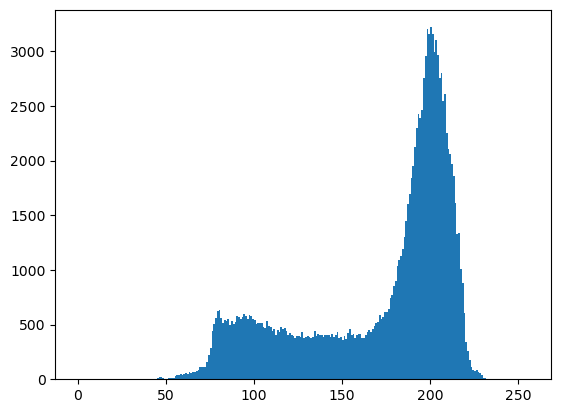

In [63]:
plt.hist(apple.flatten(),256,[0,256])
plt.show

In [64]:
equ = cv2.equalizeHist(apple)

In [65]:
wind(equ)

In [66]:
res = np.hstack((apple,equ))

In [67]:
wind(res)

In [68]:
#4.3. Convolution based operations

In [69]:
blur = cv2.blur(apple,(7,7))
wind(blur)

In [70]:
blurG = cv2.GaussianBlur(apple,(11,11),0)
wind(blurG)

In [71]:
res = np.hstack((apple,blurG))

In [72]:
wind(res)

In [73]:
#4.4. K-means classification

In [74]:
img = cv2.imread("apple.jpg",1)
wind(img)

In [75]:
imgCL = np.float32(img.reshape((-1,3)))
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,15,1.0)
k = 4
ret,lab,center = cv2.kmeans(imgCL, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res=center[lab.flatten()]
res2 = res.reshape((img.shape))
wind(res2)


## Chapter 5: An Earth Observation application

In [76]:
pathB="C:/Users/PAVILION/Desktop/DIPOpenCV/after/"
pathA="C:/Users/PAVILION/Desktop/DIPOpenCV/after/"

In [77]:
BEF=[]
AFT=[]
for i in range(1,8):
    BEF.append(cv2.imread(pathB+"B"+str(i)+".tif",0)[0:3849,0:3702])
    AFT.append(cv2.imread(pathA+"B"+str(i)+".tif",0)[0:3849,0:3702])

In [78]:
wind(BEF[6])

In [79]:
BEF32=[]
AFT32=[]
for i in range(7):
    BEF32.append(np.float32(cv2.equalizeHist(BEF[i])))
    AFT32.append(np.float32(cv2.equalizeHist(AFT[i])))

In [80]:
before = cv2.merge((BEF[0],BEF[1],BEF[2],BEF[3],BEF[4],BEF[5],BEF[6]))

In [81]:
beforeReady = np.float32(before.reshape((-1,7)))
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,1.0)
k = 6
ret,lab,center = cv2.kmeans(beforeReady, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res=center[lab.flatten()]
res2 = res.reshape((before.shape))


In [82]:
beforeF = deepcopy(res2[:][:,:,:3])

In [83]:
wind(beforeF)

In [86]:
after = cv2.merge((AFT[0],AFT[1],AFT[2],AFT[3],AFT[4],AFT[5],AFT[6]))

In [90]:
afterReady = np.float32(after.reshape((-1,7)))
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,1.0)
k = 6
ret,lab,center = cv2.kmeans(afterReady, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res=center[lab.flatten()]
res2 = res.reshape((after.shape))
afterF = deepcopy(res2[:][:,:,:3])

In [91]:
wind(afterF)

In [93]:
beforeafter = np.hstack((beforeF, afterF))
wind(beforeafter)

In [100]:
d=0 ; q=0
for i in range(len(afterF)):
    for j in range(len(afterF[i])):
        if np.sum(afterF[i][j])==0:
            d+=1
            if np.sum(beforeF[i][j])==0:
                q+=1
print("Total burned area: ",d,"square meters")
print("Forest burned area: ",q,"squre meters")

Total burned area:  14234108 square meters
Forest burned area:  14234092 squre meters
